# 📊 IPL T20 EDA Dashboard with Matplotlib & Seaborn

## 🏏 Dataset
Sourced from [Kaggle – IPLT20 Matches](https://www.kaggle.com/datasets/rahulbhasin/iplt20-matches)

## 💡 Goal
Perform Exploratory Data Analysis (EDA) on IPL matches to uncover key insights like:
- Most successful teams and players
- Toss impact
- Venue popularity
- Decision-making patterns (bat vs bowl)

## 🛠️ Tools & Libraries
- Python 🐍
- Pandas & NumPy
- Matplotlib & Seaborn
- Jupyter Notebook / VS Code


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("data/Cricket_data.csv")

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1032, 43)


,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,NaN,1370350,Chennai Super Kings v Gujarat Titans,CSK v GT,"Qualifier 1 (N), Indian Premier League at Chen...",CSK,GT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1370351,Lucknow Super Giants v Mumbai Indians,LSG v MI,"Eliminator (N), Indian Premier League at Chenn...",LSG,MI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1370352,TBC v TBC,TBC v TBC,"Qualifier 2 (N), Indian Premier League at Ahme...",TBA,TBA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1370353,TBC v TBC,TBC v TBC,"Final (N), Indian Premier League at Ahmedabad,...",TBA,TBA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre


In [3]:
print(df.columns.tolist())

['season', 'id', 'name', 'short_name', 'description', 'home_team', 'away_team', 'toss_won', 'decision', '1st_inning_score', '2nd_inning_score', 'winner', 'result', 'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom', 'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']


In [5]:
important_cols = [
    'season',
    'home_team',
    'away_team',
    'toss_won',
    'decision',
    'home_runs',
    'away_runs',
    'winner',
    'pom',                
    'venue_name'
]

df_trimmed = df[important_cols]
df_trimmed.head()


,season,home_team,away_team,toss_won,decision,home_runs,away_runs,winner,pom,venue_name
0,NaN,CSK,GT,NaN,NaN,NaN,NaN,GT,NaN,"MA Chidambaram Stadium, Chepauk, Chennai"
1,NaN,LSG,MI,NaN,NaN,NaN,NaN,MI,NaN,"MA Chidambaram Stadium, Chepauk, Chennai"
2,NaN,TBA,TBA,NaN,NaN,NaN,NaN,TBA,NaN,"Narendra Modi Stadium, Motera, Ahmedabad"
3,NaN,TBA,TBA,NaN,NaN,NaN,NaN,TBA,NaN,"Narendra Modi Stadium, Motera, Ahmedabad"
4,2023.0,RCB,GT,GT,BOWL FIRST,197.0,198.0,GT,Shubman Gill,"M.Chinnaswamy Stadium, Bengaluru"


## 📈 EDA Step 1: Most Matches Won by Teams

Find out which teams have won the most IPL matches.

In [7]:
team_wins = df_trimmed['winner'].value_counts()

print(team_wins)

winner
MI       140
CSK      132
KKR      123
RCB      116
SRH      111
DC       107
RR       106
KXIP      88
GT        23
PBKS      19
LSG       17
RPS       15
GL        13
PWI       13
Kochi      6
TBA        2
Name: count, dtype: int64


/var/folders/r4/f2j8wl756rnbhvs62r4ynd6h0000gn/T/ipykernel_87258/964010099.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


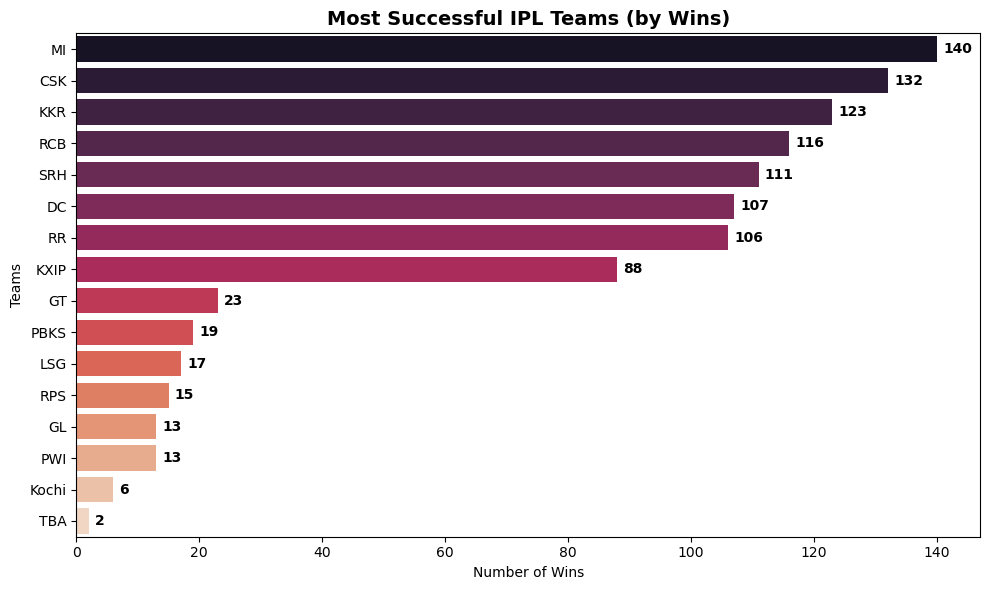

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns



team_wins = df_trimmed['winner'].dropna()
team_wins = team_wins[team_wins != 'TBC']
team_wins = team_wins.value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']


custom_colors = sns.color_palette("rocket", len(team_wins))


plt.figure(figsize=(10, 6))
sns.barplot(
    data=team_wins,
    x="Wins",
    y="Team",
    palette=custom_colors
)


for index, value in enumerate(team_wins["Wins"]):
    plt.text(value + 1, index, str(value), va='center', fontweight='bold')


plt.title("Most Successful IPL Teams (by Wins)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Wins")
plt.ylabel("Teams")
plt.tight_layout()
plt.show()


## 🏅 EDA Step 2: Top 10 Player of the Match Winners

Identify the most impactful players based on Player of the Match awards.

In [17]:
pom_counts = df_trimmed['pom'].dropna()

top_pom = pom_counts.value_counts().head(10).reset_index()
top_pom.columns = ['Player', 'Awards']

top_pom

,Player,Awards
0,AB de Villiers,25
1,Chris Gayle,22
2,Rohit Sharma,19
3,David Warner,18
4,MS Dhoni,17
5,Virat Kohli,16
6,Yusuf Pathan,16
7,Shane Watson,16
8,Kieron Pollard,14
9,Suresh Raina,14


/var/folders/r4/f2j8wl756rnbhvs62r4ynd6h0000gn/T/ipykernel_87258/3160622649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


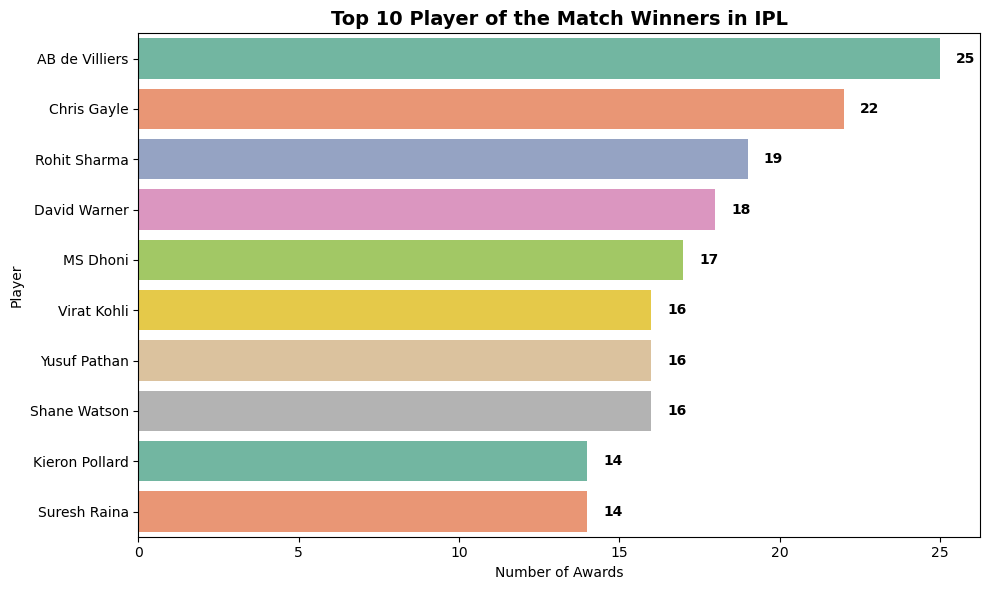

In [25]:

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_pom,
    x='Awards',
    y='Player',
    palette='Set2'
)


for index, value in enumerate(top_pom["Awards"]):
    plt.text(value + 0.5, index, str(value), va='center', fontweight='bold')


plt.title("Top 10 Player of the Match Winners in IPL", fontsize=14, fontweight='bold')
plt.xlabel("Number of Awards")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


## 🎯 EDA Step 3: Toss Winner Also Winning the Match?

Check if winning the toss gives an edge in the match.

In [23]:
df_trimmed.loc[:, 'toss_and_match_winner'] = df_trimmed['toss_won'] == df_trimmed['winner']

In [24]:
toss_impact = df_trimmed['toss_and_match_winner'].value_counts()
print(toss_impact)

toss_and_match_winner
True     522
False    510
Name: count, dtype: int64


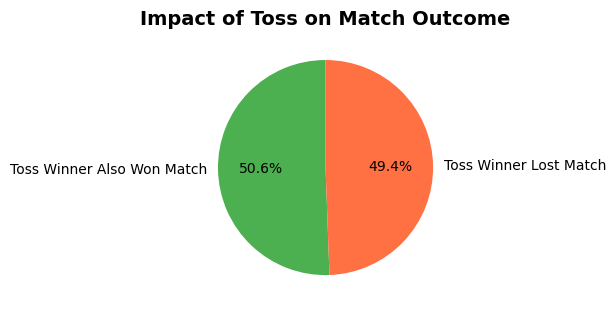

In [26]:

labels = ['Toss Winner Also Won Match', 'Toss Winner Lost Match']
sizes = [toss_impact[True], toss_impact[False]]
colors = ['#4CAF50', '#FF7043']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Impact of Toss on Match Outcome", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 🏟️ EDA Step 4: Most Popular Venues

Top 10 IPL stadiums based on number of matches hosted.


In [28]:
venue_counts = df_trimmed['venue_name'].dropna()

venue_match_counts = venue_counts.value_counts().head(10).reset_index()
venue_match_counts.columns = ['Venue', 'Matches']
venue_match_counts

,Venue,Matches
0,"Wankhede Stadium, Mumbai",111
1,"M.Chinnaswamy Stadium, Bengaluru",90
2,"Eden Gardens, Kolkata",88
3,"Arun Jaitley Stadium, Delhi",86
4,"MA Chidambaram Stadium, Chepauk, Chennai",76
5,"Rajiv Gandhi International Stadium, Uppal, Hyd...",71
6,"Punjab Cricket Association IS Bindra Stadium, ...",61
7,"Sawai Mansingh Stadium, Jaipur",52
8,"Maharashtra Cricket Association Stadium, Pune",51
9,Dubai International Cricket Stadium,46


/var/folders/r4/f2j8wl756rnbhvs62r4ynd6h0000gn/T/ipykernel_87258/632033289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


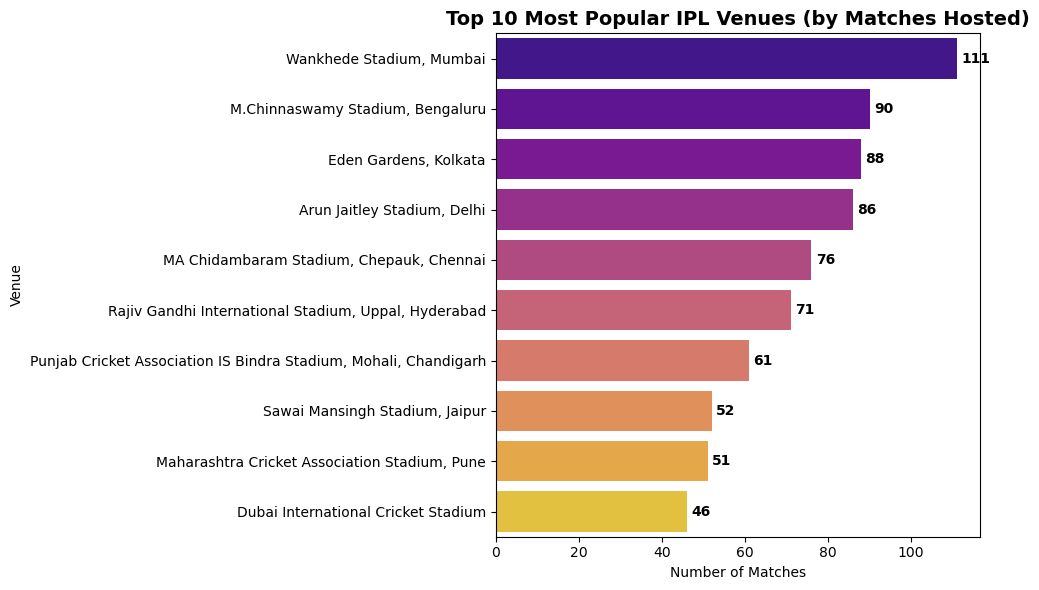

In [29]:

plt.figure(figsize=(10, 6))
sns.barplot(
    data=venue_match_counts,
    x='Matches',
    y='Venue',
    palette='plasma'
)


for index, value in enumerate(venue_match_counts['Matches']):
    plt.text(value + 1, index, str(value), va='center', fontweight='bold')


plt.title("Top 10 Most Popular IPL Venues (by Matches Hosted)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.tight_layout()
plt.show()


## 🔄 EDA Step 5: Toss Decision – Bat vs Bowl

How often do teams choose to bat/bowl after winning the toss?

In [30]:

decision_counts = df_trimmed['decision'].dropna()


toss_decision_counts = decision_counts.value_counts().reset_index()
toss_decision_counts.columns = ['Decision', 'Count']

print(toss_decision_counts)


     Decision  Count
0  BOWL FIRST    649
1   BAT FIRST    371
2     no toss      7


/var/folders/r4/f2j8wl756rnbhvs62r4ynd6h0000gn/T/ipykernel_87258/2711885297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=toss_decision_counts, x='Decision', y='Count', palette='Set2')


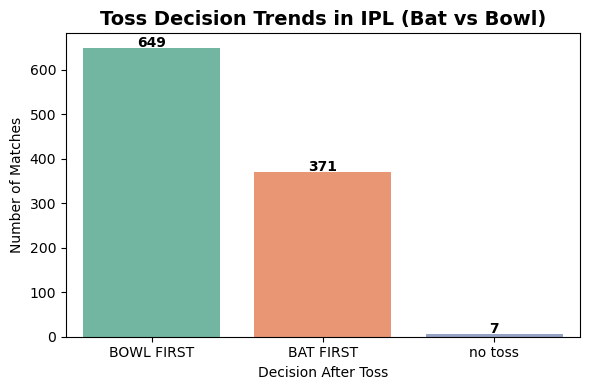

In [31]:

plt.figure(figsize=(6, 4))
sns.barplot(data=toss_decision_counts, x='Decision', y='Count', palette='Set2')


for index, row in toss_decision_counts.iterrows():
    plt.text(x=index, y=row['Count'] + 2, s=row['Count'], ha='center', fontweight='bold')


plt.title("Toss Decision Trends in IPL (Bat vs Bowl)", fontsize=14, fontweight='bold')
plt.xlabel("Decision After Toss")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()


## ⚔️ EDA Step 6: Team Performance Based on Toss Decision

Compare wins when toss-winners chose to bat vs bowl.

In [33]:

toss_win_match_win = df_trimmed[df_trimmed['toss_won'] == df_trimmed['winner']]


In [35]:
strategy_success = toss_win_match_win['decision'].value_counts().reset_index()
strategy_success.columns = ['Decision', 'Matches Won']

print(strategy_success)

     Decision  Matches Won
0  BOWL FIRST          356
1   BAT FIRST          166


In [38]:

strategy_success.columns = ['Decision', 'Matches_Won']


/var/folders/r4/f2j8wl756rnbhvs62r4ynd6h0000gn/T/ipykernel_87258/1563389959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=strategy_success, x='Decision', y='Matches_Won', palette='rocket')


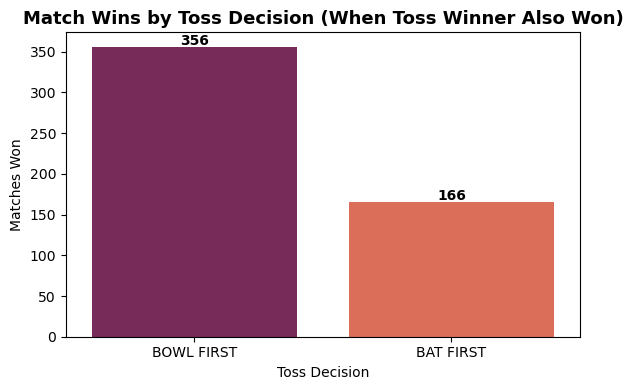

In [39]:
plt.figure(figsize=(6, 4))
sns.barplot(data=strategy_success, x='Decision', y='Matches_Won', palette='rocket')


for index, row in strategy_success.iterrows():
    plt.text(x=index, y=row['Matches_Won'] + 2, s=row['Matches_Won'], ha='center', fontweight='bold')

plt.title("Match Wins by Toss Decision (When Toss Winner Also Won)", fontsize=13, fontweight='bold')
plt.xlabel("Toss Decision")
plt.ylabel("Matches Won")
plt.tight_layout()
plt.show()
